# Clase 19: Scipy y computación numérica
En esta clase revisaremos el trabajo, la librería `scipy`. 

## Scipy

La librería `scipy` es una librería de computación científica que utiliza `numpy`. Nos va a permitir realizar optimización, procesos estadísticos, interpolación, procesamiento de imágenes, integración, entre otros. 


### Álgebra lineal
Para operaciones de álgebra lineal podemos ocupar el módulo `linag`. 

In [2]:
#1. Determinante de una matriz
import numpy as np
from scipy import linalg
arr = np.array([[1, 2],
               [3, 4]])
linalg.det(arr)

-2.0

In [3]:
arr = np.array([[3, 2],
                [6, 4]])

linalg.det(arr)

0.0

In [4]:
#2. Inversa de una matriz
linalg.inv(arr)
# calcular la inversa de una matriz singular (su determinante es cero) generará un error

LinAlgError: singular matrix

In [5]:
arr = np.array([[1, 2],
               [3, 4]])
linalg.inv(arr)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

## Optimización
Podemos ocupar el módulo `optimize` para encontrar el mínimo (máximo) de una función (escalares o multidimensional). 

In [6]:
from scipy import optimize
import matplotlib.pyplot as plt

In [7]:
def f(x):
    return x**2 + 10*np.sin(x)

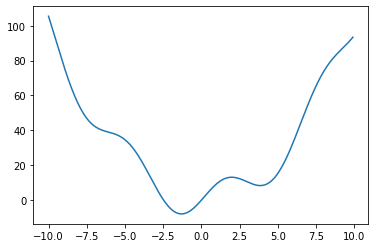

In [8]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show() 

Mínimo global: corresponde al valor mínimo en el dominio de la función. 
Mínimo local: corresponde al valor mínimo en una región particular de la curva. 

En el ejemplo tenemos un mínimo local y un mínimo global. Mediante un algoritmo de scipy podemos encontrar estos valores, por ejemplo podemos usar la función `fmin_bfgs` (método BFGS) para encontrar el mínimo. 

In [9]:
#Usamos el módigo optmize, la función fmin_bfgs
#La sintaxis es fmin_bfgs(función a optimizar, valor inicial)
opt = optimize.fmin_bfgs(f, 0)
print(opt)
#El resultado nos entrega: 
#1) Valor de la función evaluada en el punto mínimo
#2) Número de iteraciones que se demoró en encontrar el mínimo
#3) Número de evaluaciones de la función
#4) Número de evaluaciones del gradiente
#5) Parámetro que minimiza la función

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 6
[-1.30644012]


Por la naturaleza del método podemos quedar en el mínimo local si no partimos del "lado correcto"


In [10]:
optimize.fmin_bfgs(f, 3)

Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 6
         Function evaluations: 14
         Gradient evaluations: 7


array([3.83746709])

Cuando no sabemos el intervalo del mínimo global podemos ocupar un método costoso que utiliza la fuerza bruta, en que se evalúa la función en cada punto

In [11]:
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
xmin_global

array([-1.30641113])

Podemos encontrar un mínimo local (dentro de un intervalo), usando `fminbound`

In [12]:
xmin_local = optimize.fminbound(f, 0, 10)    
print(xmin_local)

3.8374671194983834


Para encontrar las raíces de una función, podemos utilizar fsolve. La raíz corresponde al punto donde $f(x)=0$. 

In [13]:
root = optimize.fsolve(f, 1)  # our initial guess is 1
root

array([0.])

Si la función tiene más de una raíz, tenemos que cambiar el valor inicial para partir de un punto que nos lleve a la segunda (tercera...) solución

In [14]:
root2 = optimize.fsolve(f, -2.5)
root2

array([-2.47948183])

Text(0, 0.5, 'f(x)')

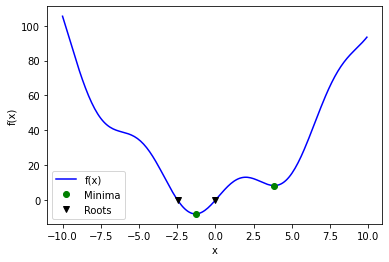

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f(x), 'b-', label="f(x)")
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")
roots = np.array([root, root2])
ax.plot(roots, f(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

Supongamos que $f$ tiene un poco de ruido

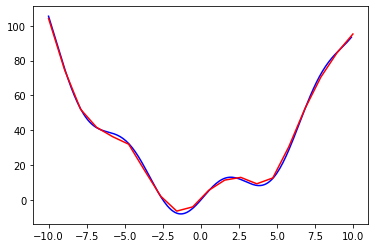

In [16]:
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)


plt.plot(x, f(x), 'b-', label="f(x)")
plt.plot(xdata, ydata, color="red")

La forma funcional original es
$$f(x) = x^2 + 10*sin(x)$$

Entonces podemos generalizar mediante

$$f(x,a,b) = a*x^2 + b*sin(x)$$

Mediante `curve_fit()` podemos encontrar los valores de `a` y `b`. 

In [17]:
def f2(x,a ,b):
    return a*x**2 + b**np.sin(x)

In [18]:
#Valor inicial
guess = [2,2]

#curve_fit(f, xdata, ydata, valor inicial)
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)

#retorna: 
#1) Valores óptimos que minimizan f(xdata) - ydata
#2) Covarianza estimada de valores óptimos
params

array([ 0.95241285, 11.53081666])

Text(0, 0.5, 'f(x)')

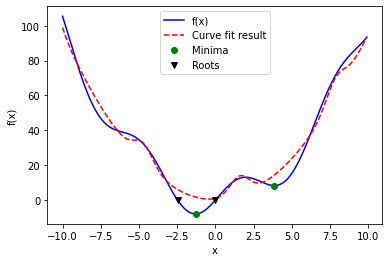

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f(x), 'b-', label="f(x)")
ax.plot(x, f2(x, *params), 'r--', label="Curve fit result")

xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")
roots = np.array([root, root2])
ax.plot(roots, f(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

## Estadísticas y números aleatorios
Podemos ocupar el módulo `scipy.stats` tiene potentes herramientas estadísticas y probabilísticas. 

Para la generación de procesos aleatorios podemos ocupar `numpy.random`

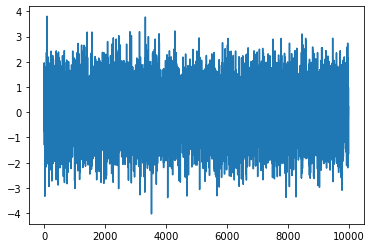

In [20]:
a = np.random.normal(size=10_000)
plt.plot(a)

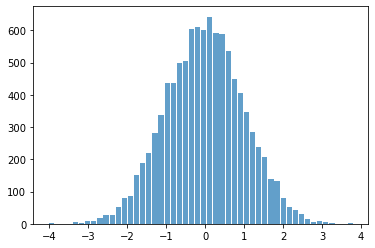

In [27]:
plt.hist(x=a, bins=50, alpha=0.7, rwidth=0.85);

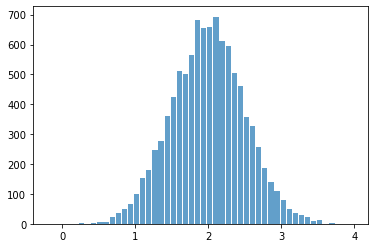

In [26]:
mu, sigma = 2, 0.5
s = np.random.normal(mu, sigma, 10000)
plt.hist(x=s, bins=50, alpha=0.7, rwidth=0.85);

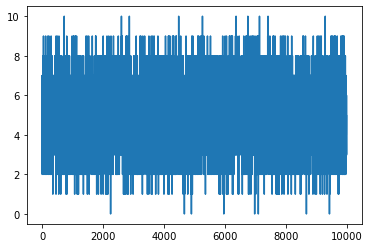

In [28]:
n, p = 10, .5 
s = np.random.binomial(n, p, 10_000)
plt.plot(s)
#Resultado de tirar una moneda 10 veces, testeado 10_000 veces

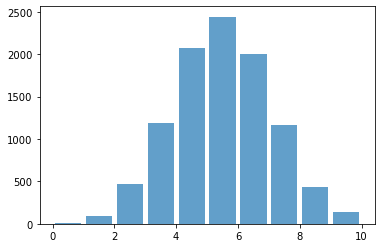

In [30]:
plt.hist(x=s, bins=10, alpha=0.7, rwidth=0.85);

In [37]:
sum(np.random.binomial(2, 0.1, 20000) == 0)/20000
#COrremos el modelo 20_000 veces, y vemos el resultado de la probabilidad que se generen valores igual a cero

0.81165

Probability density function for *norm*: 
$$f(x) = \frac{exp(-x^2/2)}{\sqrt{2\pi}}$$

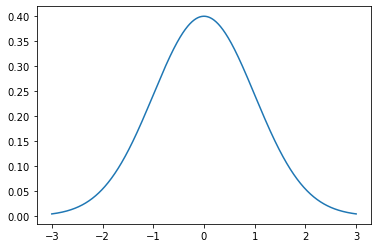

In [38]:
#Probability density function
from scipy.stats import norm

#Obtener momentos
x = np.linspace(-3, 3, 1000)
pdf = norm.pdf(x)
plt.plot(x, pdf)

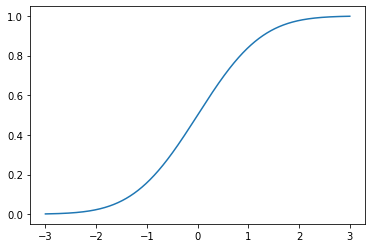

In [39]:
cdf = norm.cdf(x)
plt.plot(x, cdf)

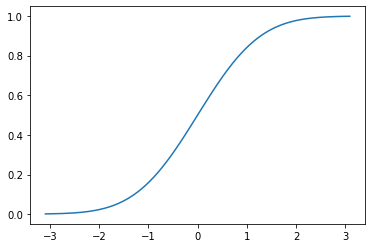

In [40]:
cdf = np.linspace(0, 1, 1000)
ppf = norm.ppf(cdf)
plt.plot(ppf, cdf)

## Interpolación
Cuando tenemos datos y no conocemos su forma funcional, podemos realizar una aproximación mediante una interpolación. Esto consiste en evaluar los puntos y obtener una aproximación de la función. En simple, nos permite mediante un set de valores `discretos` tener una función que nos permite tener un espacio `continuo` 

Para esto podemos ocupar el módulo `interpolate`

In [41]:
#Creamos datos experimentales: ejm similar a una función seno
x = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
valores = np.sin(2 * np.pi * x) + noise

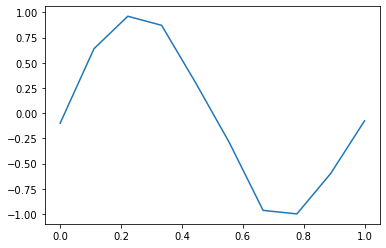

In [42]:
plt.plot(x, valores);

In [43]:
from scipy.interpolate import interp1d

#Creamos valores nuevos
val_nuevos = np.linspace(0, 1, 50)
#Interpolación lineal
linear_interp = interp1d(x, valores)
linear_results = linear_interp(val_nuevos)
#Interpolación cúbica
cubic_interp = interp1d(x, valores, kind='cubic')
cubic_results = cubic_interp(val_nuevos)

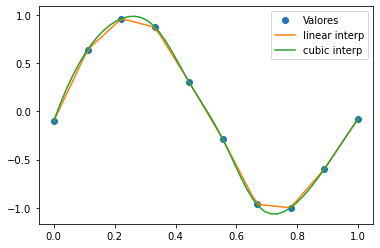

In [44]:
plt.plot(x, valores, 'o', ms=6, label='Valores')
plt.plot(val_nuevos, linear_results, label='linear interp')
plt.plot(val_nuevos, cubic_results, label='cubic interp')
plt.legend()
plt.show()

## Actividad
1. Obtenga la inversa de una matriz **a** del tipo 
$$a = \left[ \begin{array}{ccc}
3 & 2 & 0 \\
1 & -1  & 0 \\
0 & 5 & 1 \\ 
\end{array}\right]$$

In [4]:
inv_a = linalg.inv(a)

2. Resuelva el sistema $a*x = b$, donde 
$$b = \left[ \begin{array}{c}
2 \\
4 \\
-1 \\
\end{array}\right]$$

In [5]:
import numpy as np
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])

b = np.array([2, 4, -1])

from scipy import linalg

x = linalg.solve(a, b)
x

array([ 2., -2.,  9.])

3. Si compara $x = a^{-1}*b$ usando 1) con el resultado de 2), son iguales? 

In [6]:
inv_a @ b

array([ 2., -2.,  9.])

In [7]:
4. 

4.0

In [13]:
b = 10;

def f(X): 
    return (X[0]-1)**2 + b*(X[1]-X[0]**2)**2

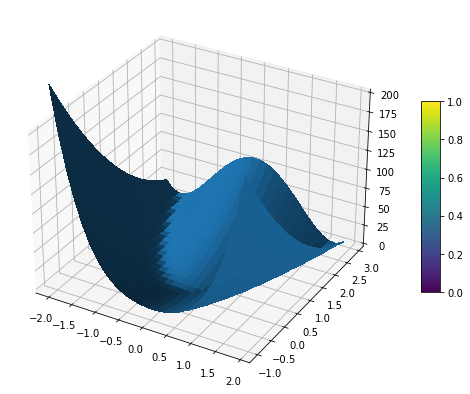

In [14]:
# Initialize figure 
import matplotlib.pyplot as plt
figRos = plt.figure(figsize=(12, 7))
axRos = figRos.gca(projection='3d')

# Evaluate function
X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)
Z = f([X,Y])

# Plot the surface
surf = axRos.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)
axRos.set_zlim(0, 200)
figRos.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

In [17]:
from scipy.optimize import least_squares
input = np.array([2, 2])
res = least_squares(f, input)
res

 active_mask: array([0., 0.])
        cost: 0.0021748096395843544
         fun: array([0.06595164])
        grad: array([-0.00102082,  0.01379367])
         jac: array([[-0.01547836,  0.20914825]])
     message: 'The maximum number of function evaluations is exceeded.'
        nfev: 200
        njev: 189
  optimality: 0.013793670721659863
      status: 0
     success: False
           x: array([1.25467248, 1.58466043])